# **Visión computacional para imágenes y video**
## **Maestría en Inteligencia Artificial Aplicada**
### **Dr. Gilberto Ochoa Ruiz**
### **Tecnológico de Monterrey**
## **9.4 Google Colab con algoritmo Otsu**

---

### Equipo 37

- Jorge Luis Ancheyta Segovia - A01796354
- Omar Aguilar Macedo - A01797078

# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)
4. [Challenge](#challenge)
    1. [Experimentación](#experimentacion)
    2. [Otsu + Sliding Window](#sliding)
    3. [Discusión](#discusion)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np

import cv2
from skimage.filters import rank
from skimage.morphology import disk, footprint_rectangle
from skimage import util

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

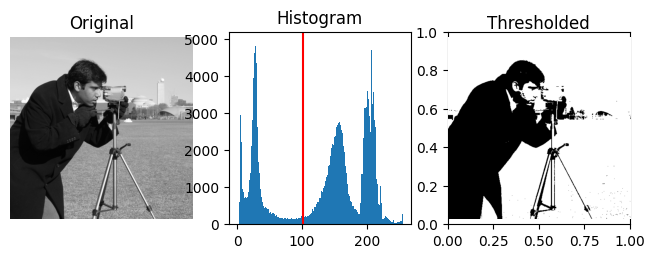

In [2]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




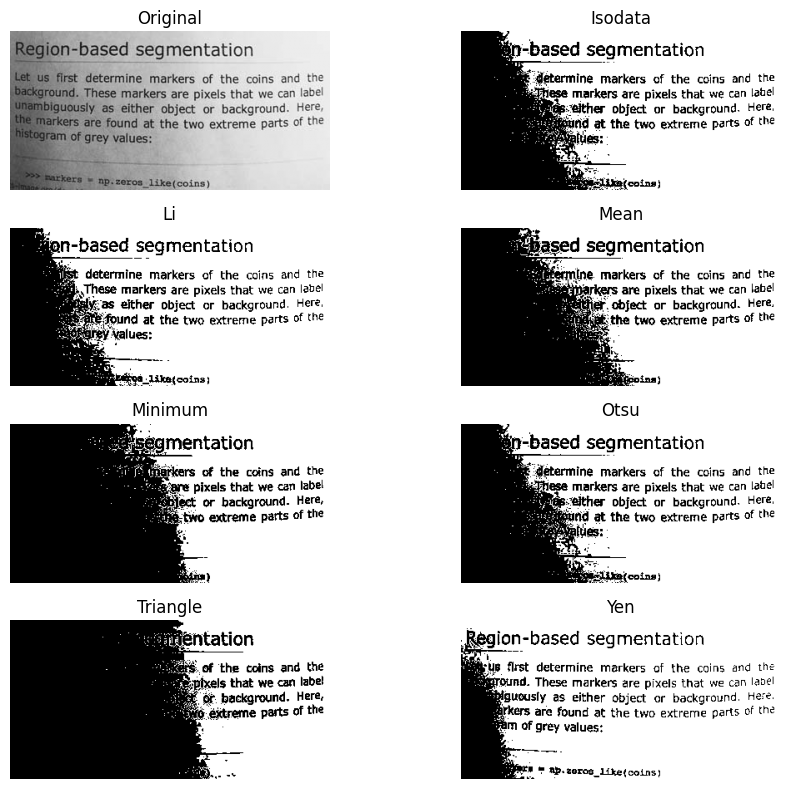

In [3]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [4]:
# TODO: Slide image for segmentation, alpha blerding
# Implementado al final

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

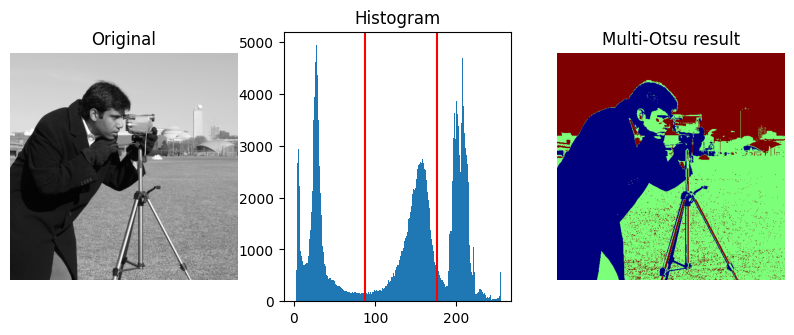

In [5]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

# Challenge <a name="challenge" />
- Experimenta con diferentes imagenes ademas de las provistas en en Colab, identifca imagenes con diferentes backgrounds y estilos, cuales son las limitaciones de single thresholding contra el algoritmo de Otsu

- (Opcional) Como en un proyecto previo, es posible aplicar Otsu para ventanas de diferentes tamaños, obteniendo mejores resultados. Realiza esta implementacion y ve como mejoran los resultados con el ejemplo de la hoja de papel.


## Experimentación <a name="experimentacion" />

In [6]:
#@title Datos

def get_more_images():
  return [
    ('Cake', read_image('data/cake.jpg')),
    ('Flower', read_image('data/flower_bw.jpg')),
    ('Home Sweet Home', read_image('data/hwh.jpg')),
    ('Lake', read_image('data/image.jpg')),
    ('Lizard', read_image('data/lizard.jpg')),
    ('Lunetas', read_image('data/lunetas.jpg')),
    ('Creature', read_image('data/creature_02.jpg')),
    ('Sudoku', read_image('data/sudoku.png')),
  ]

def get_synthetic_images():
  H, W = 256, 256

  # Bimodal
  img1 = np.zeros((H,W), np.uint8)
  cv2.circle(img1, (W//2, H//2), 70, 180, -1)

  # Iluminación desigual
  x = np.linspace(0, 1, W, dtype=np.float32)
  grad = (x[None,:]*120).astype(np.float32)
  obj = cv2.GaussianBlur((img1>0).astype(np.float32)*120, (51,51), 0)
  img2 = (grad + obj).clip(0,255).astype(np.uint8)

  # Textura con ruido
  rng = np.random.default_rng(0)
  img3 = (rng.normal(110, 25, size=(H,W))).clip(0,255).astype(np.uint8)
  cv2.rectangle(img3, (60,60), (200,200), 180, -1)
  mask3 = np.zeros_like(img3, np.uint8)
  mask3[60:200, 60:200] = 1

  return [
      ('bimodal', img1),
      ('iluminación desigual', img2),
      ('textura con ruido', img3),
  ]

def get_skimage_images():
  return [
      ('Monedas', data.coins()),
      ('Mitósis Humano', data.human_mitosis()),
      ('Águila', data.eagle())
  ]


In [7]:
#@title Utils
def read_image(image_path):
  return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def draw_images(imgs, figsize=(8, 6), grid=(2,2)):
  plt.figure(figsize=figsize)
  for i, (title, img) in enumerate(imgs):
    plt.subplot(grid[0], grid[1], i + 1), plt.title(title); plt.imshow(img, cmap="gray"); plt.axis('off');
  plt.tight_layout()

# Otsu with sliding window using skimage
def otsu_local(gray, footprint = disk(15)):
  local_threshold_otsu = rank.otsu(gray, footprint)
  # Aplicamos el local threshold a la imagen original
  binary = gray >= local_threshold_otsu
  return (binary, local_threshold_otsu)

# Otsu global usando skimage
def otsu_global(gray):
  global_threshold_otsu = threshold_otsu(gray)
  # Aplicamos el local threshold a la imagen original
  binary = gray >= global_threshold_otsu
  return (binary, global_threshold_otsu)

# Otsu naive, usa cv para calcular el threshold de otsu
def otsu_local_naive_cv(gray, window_size = (64, 64), step_size = (32, 32)):
  output_image = np.zeros_like(image)
  for y in range(0, image.shape[0] - window_size[1] + 1, step_size[1]):
    for x in range(0, image.shape[1] - window_size[0] + 1, step_size[0]):
      # Obtenemos la ventana
      window = image[y:y + window_size[1], x:x + window_size[0]]
      # Aplicamos otsu threshold a la ventana
      _, thresholded_window = cv2.threshold(window, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
      # Actualizamos la ventana
      output_image[y:y + window_size[1], x:x + window_size[0]] = thresholded_window
  return output_image

# Aplicamos la fórmula de otsu a un histograma
def otsu_threshold_from_hist(hist, total):
  # Niveles 0..255
  levels = np.arange(256, dtype=np.float64)

  hist = hist.astype(np.float64)

  # Probabilidades
  p = hist.astype(np.float64) / total
  # Probabilidad acumulada (w0) y media acumulada (mu0)
  w0 = np.cumsum(p)
  mu0 = np.cumsum(p * levels)
  # Media global
  muT = mu0[-1]
  # Evitar divisiones por cero
  w1 = 1.0 - w0
  valid = (w0 > 0) & (w1 > 0)
  # Varianza entre clases:
  # sigma_b^2 = (muT*w0 - mu0)^2 / (w0 * w1)
  sigma_b2 = np.zeros_like(p)
  sigma_b2[valid] = ((muT * w0[valid] - mu0[valid]) ** 2) / (w0[valid] * w1[valid])

  # Umbral óptimo = índice que maximiza sigma_b^2
  t = int(np.argmax(sigma_b2))
  return t

def otsu_local_manual(gray, window_size=32):
  h, w = gray.shape
  r = window_size // 2

  padded = np.pad(gray, pad_width=r, mode='edge')
  th_map = np.zeros((h, w), dtype=np.uint8)
  binary = np.zeros((h, w), dtype=np.uint8)

  # Recorremos cada fila de la imagen original
  for y in range(h):
    # Ventanas verticales: filas [y : y+window_size]
    row_block = padded[y:y + window_size, :]

    # Histograma de la primera ventana de la fila (x=0)
    window = row_block[:, 0:window_size]
    hist, _ = np.histogram(window, bins=256, range=(0, 256))

    total = window.size
    t = otsu_threshold_from_hist(hist, total)
    th_map[y, 0] = t
    binary[y, 0] = 255 if gray[y, 0] >= t else 0

    # Deslizamos la ventana horizontalmente
    for x in range(1, w):
      # sale (x-1) y entra (x-1 + window_size)
      col_out = row_block[:, x - 1]
      col_in  = row_block[:, x - 1 + window_size]

      # Actualizar histograma:
      # restar contribución de col_out, sumar de col_in
      # (para cada pixel cambiar el bin correspondiente)
      for val in col_out:
          hist[val] -= 1
      for val in col_in:
          hist[val] += 1

      # Nuevo umbral Otsu local
      t = otsu_threshold_from_hist(hist, total)
      th_map[y, x] = t
      binary[y, x] = 255 if gray[y, x] >= t else 0

  return binary, th_map

In [8]:
#@title Cargar Imagenes
synthetic_imgs = get_synthetic_images()
other_imgs = get_more_images()
skimage_imgs = get_skimage_images()

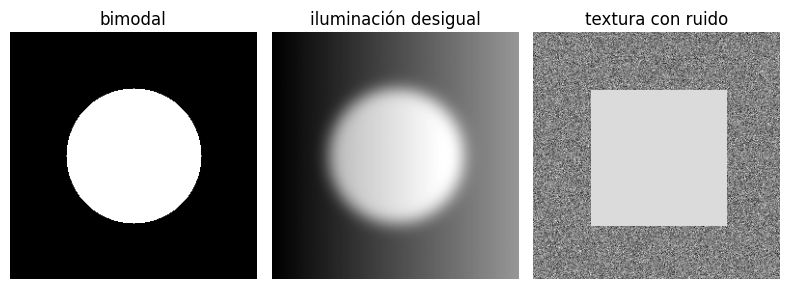

In [9]:
#@title Imagenes Sintéticas
draw_images(synthetic_imgs, figsize=(8,4), grid=(1, 3))

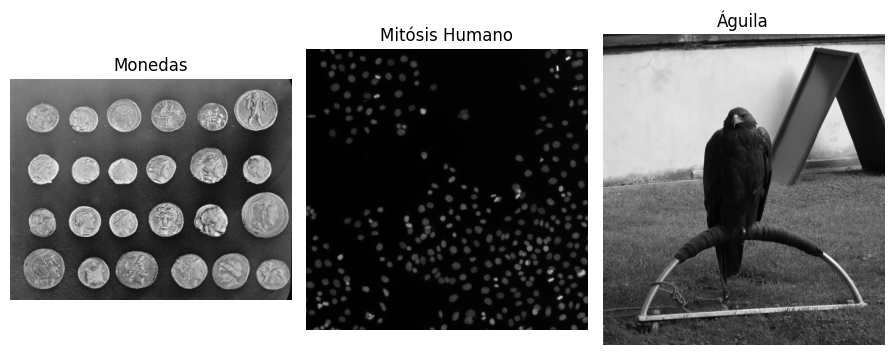

In [10]:
#@title Imagenes Skimage
draw_images(skimage_imgs, figsize=(12,4), grid=(1, 4))

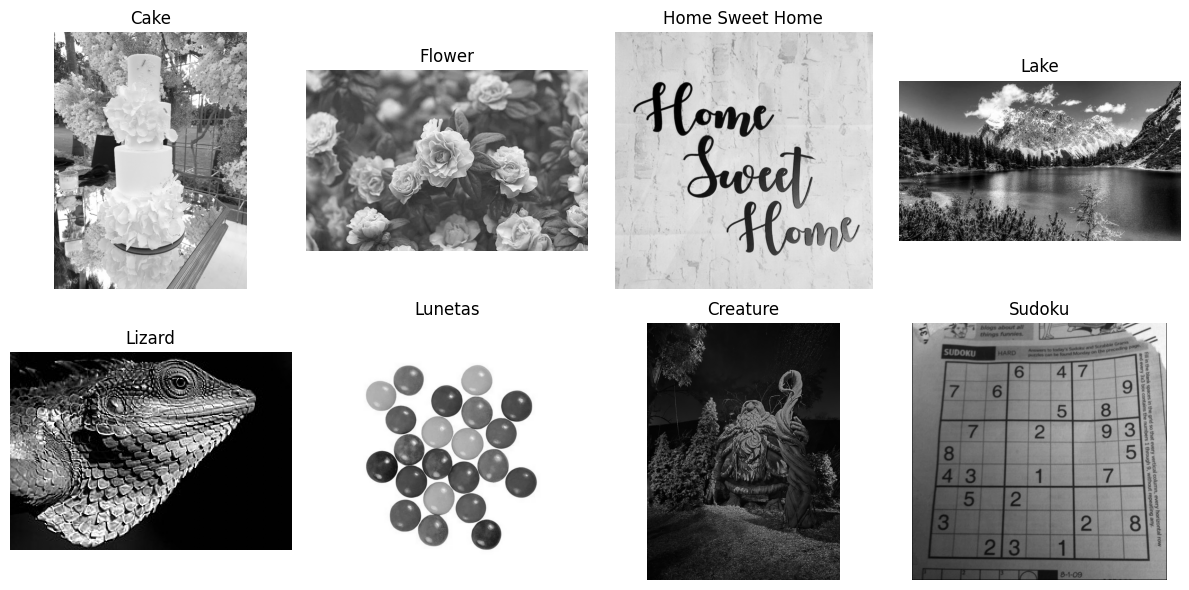

In [11]:
#@title Más Imagenes
draw_images(other_imgs, figsize=(12,6), grid=(2,4))

In [12]:
#@title Comparación de Otsu vs Single Thresholding
def draw_otsu_vs_single(img, figsize=(10,4)):
  binary_global, global_threshold  = otsu_global(img)
  binary_local,  _                 = otsu_local(img)
  _, thresh_64 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
  _, thresh_128 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
  _, thresh_192 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)

  plt.figure(figsize=figsize)
  plt.subplot(2, 4, 1), plt.title('Original');    plt.imshow(img, cmap="gray"); plt.axis('off');
  plt.subplot(2, 4, 2), plt.title(f'Otsu Global (threshold={global_threshold})'); plt.imshow(binary_global, cmap="gray"); plt.axis('off');
  plt.subplot(2, 4, 3), plt.title('Histogram');   plt.hist(img.ravel(), bins=256); plt.axvline(global_threshold, color='r'); plt.axis('off');
  plt.subplot(2, 4, 4), plt.title('Otsu Local');  plt.imshow(binary_local, cmap="gray"); plt.axis('off');
  plt.subplot(2, 4, 5), plt.title('Binary Threshold 127'); plt.imshow(thresh_64, cmap="gray"); plt.axis('off');
  plt.subplot(2, 4, 6), plt.title('Trunc Threshold'); plt.imshow(thresh_128, cmap="gray"); plt.axis('off');
  plt.subplot(2, 4, 7), plt.title('To Zero Threshold'); plt.imshow(thresh_192, cmap="gray"); plt.axis('off');
  plt.tight_layout()

# Obtenemos el siguiente par de imagenes por medio de un generador
def img_generator(imgs):
    idx = 0
    while idx < len(imgs):
        # regresamos la posición 1 que es la imagen
        yield imgs[idx][1]
        idx += 1


synth_gen = img_generator(synthetic_imgs)
other_gen = img_generator(other_imgs)
skimage_gen = img_generator(skimage_imgs)


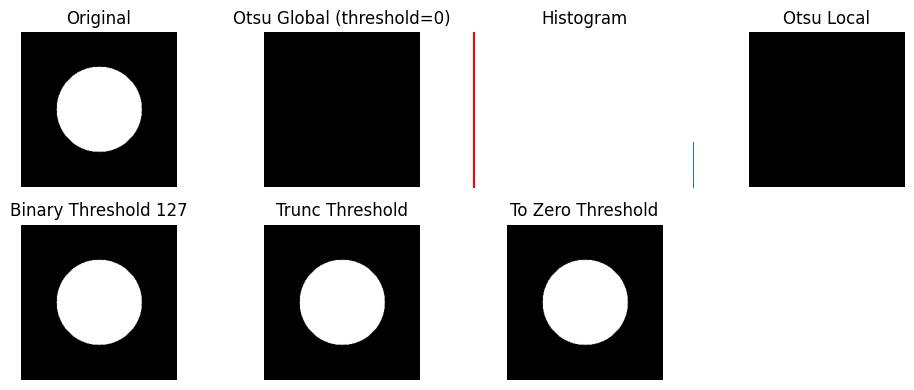

In [13]:
#@title Synthetic
draw_otsu_vs_single(next(synth_gen))

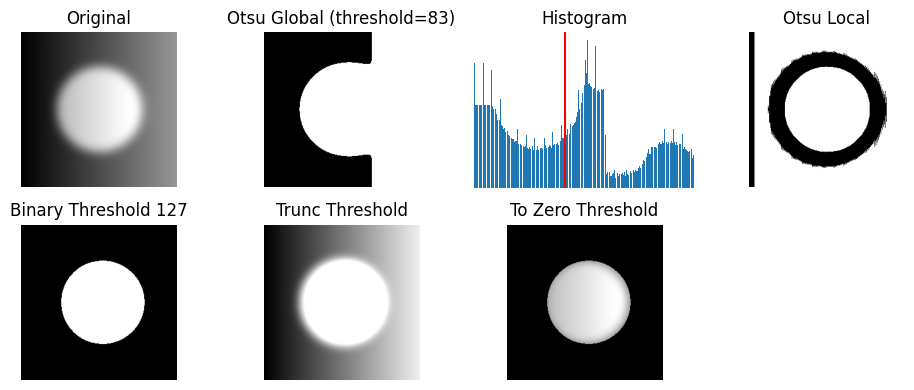

In [14]:
draw_otsu_vs_single(next(synth_gen))

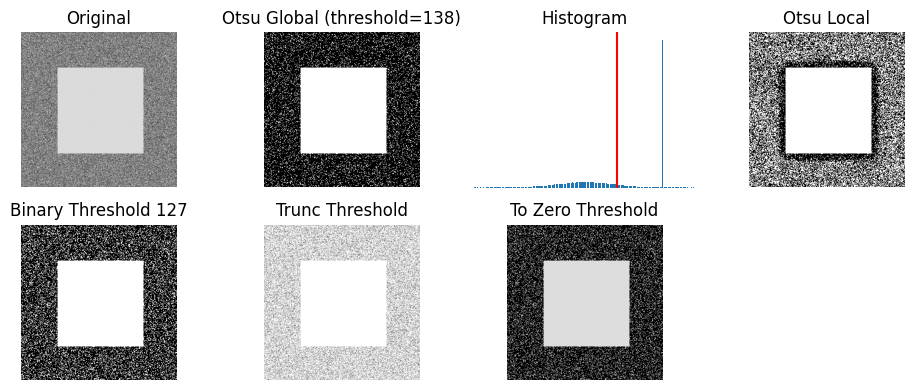

In [15]:
draw_otsu_vs_single(next(synth_gen))

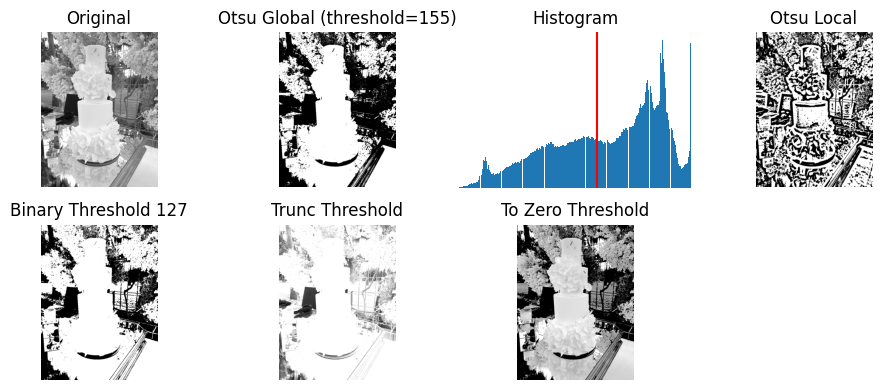

In [16]:
#@title More Images
draw_otsu_vs_single(next(other_gen))

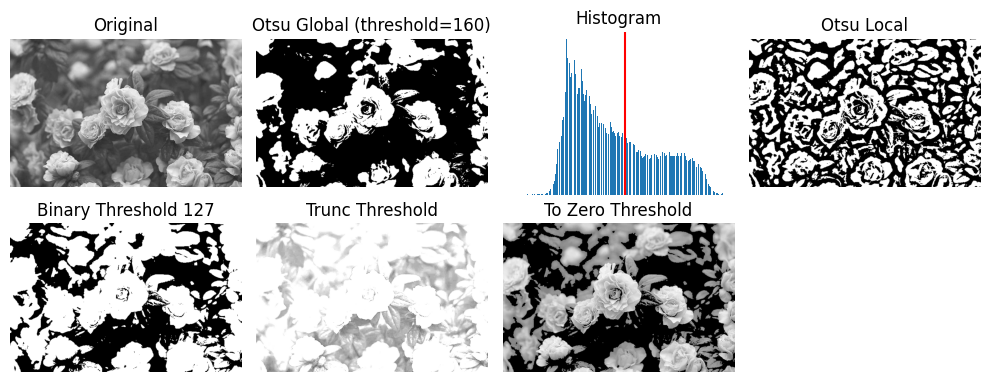

In [17]:
draw_otsu_vs_single(next(other_gen))

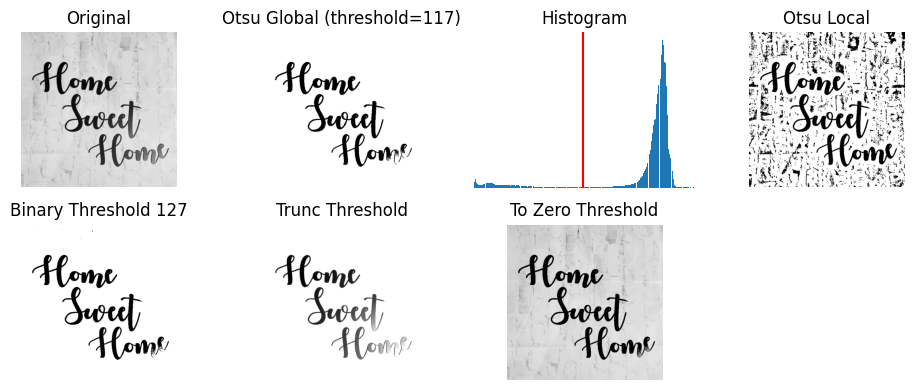

In [18]:
draw_otsu_vs_single(next(other_gen))

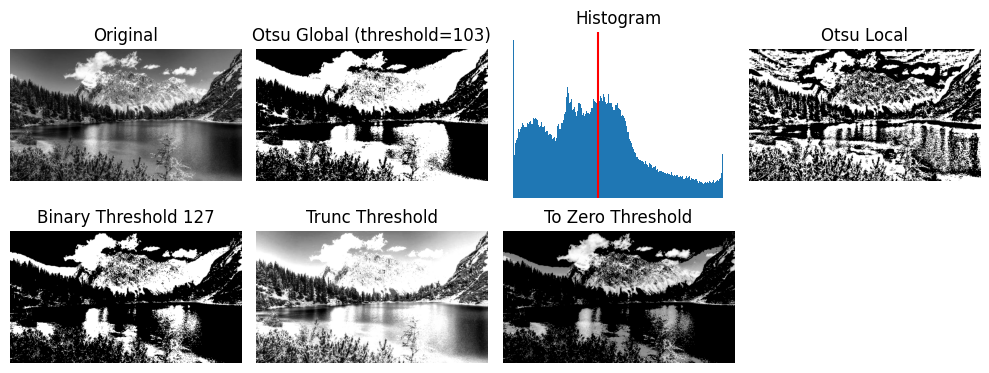

In [19]:
draw_otsu_vs_single(next(other_gen))

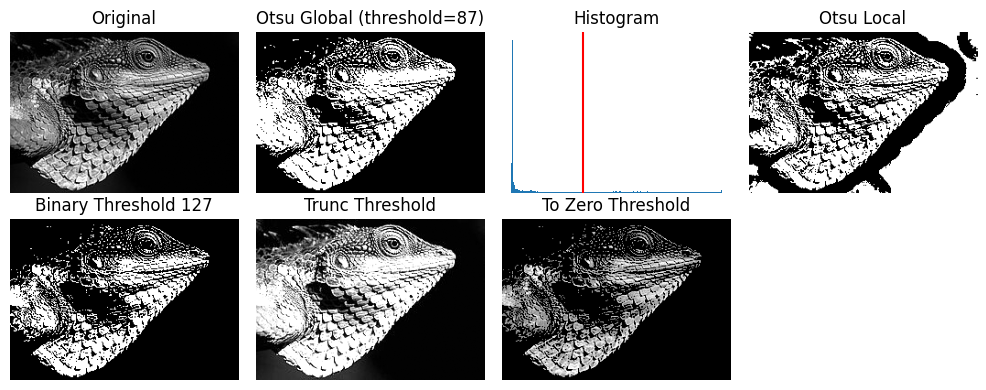

In [20]:
draw_otsu_vs_single(next(other_gen))

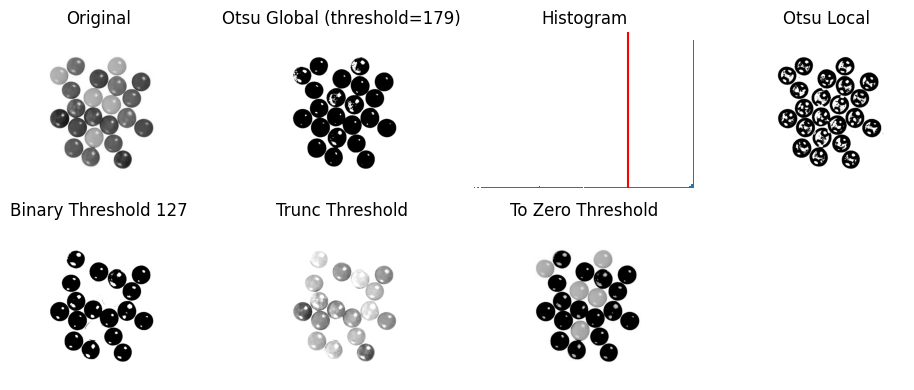

In [21]:
draw_otsu_vs_single(next(other_gen))

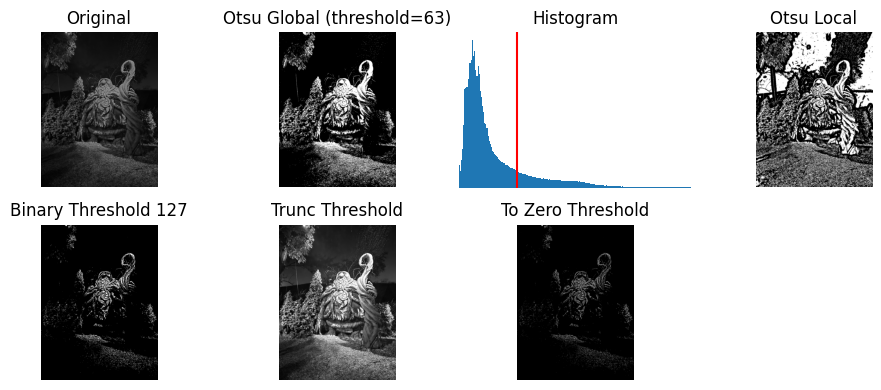

In [22]:
draw_otsu_vs_single(next(other_gen))

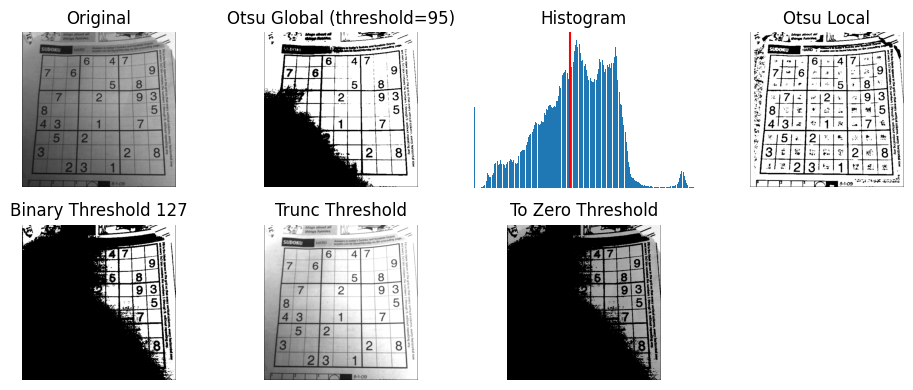

In [23]:
draw_otsu_vs_single(next(other_gen))

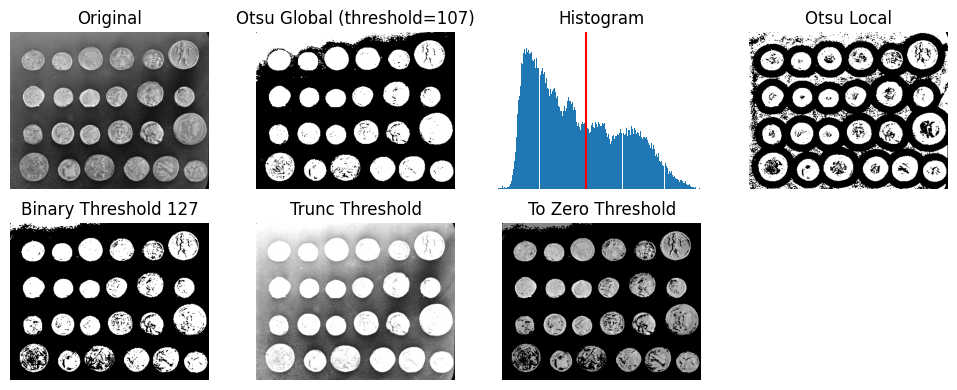

In [24]:
#@title Skimage Images
draw_otsu_vs_single(next(skimage_gen))

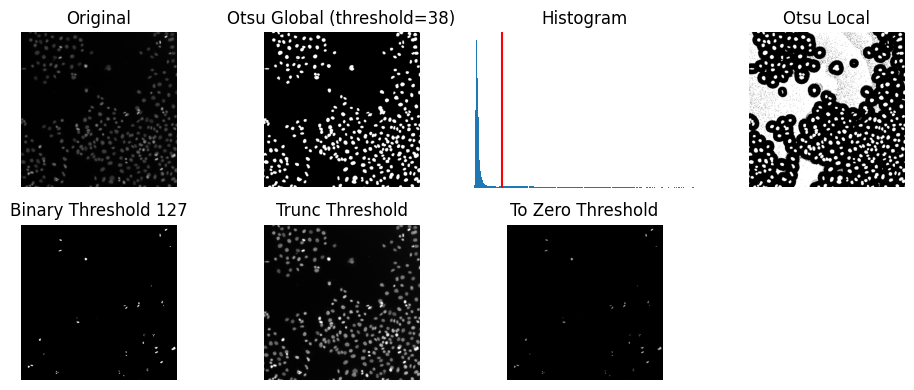

In [25]:
draw_otsu_vs_single(next(skimage_gen))

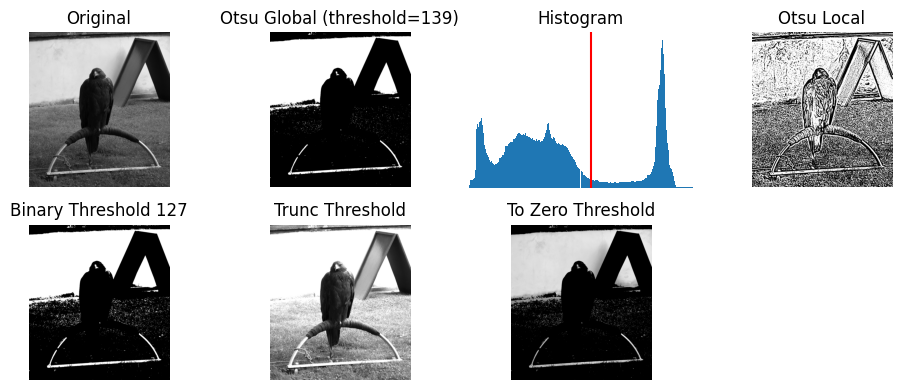

In [26]:
draw_otsu_vs_single(next(skimage_gen))

## Otsu + Sliding Window <a name="sliding" />

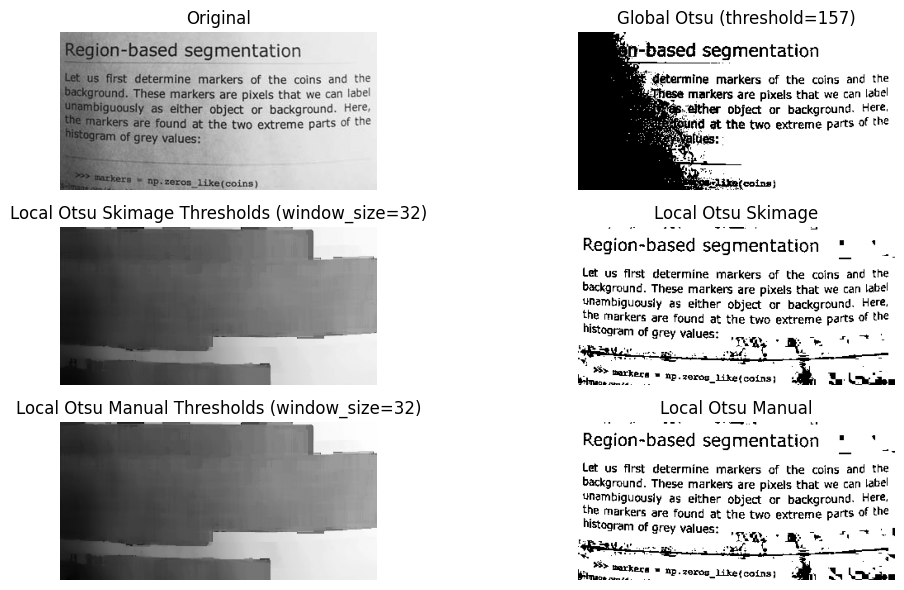

In [27]:
# Aplicamos otsu global y con sliding window a la imagen de la hoja de papel
window_size = 32

local_skimage, local_thresholds_skimage = otsu_local(img, footprint_rectangle((window_size, window_size)))
local_manual,  local_thresholds_manual  = otsu_local_manual(img, window_size)
binary_global, global_threshold         = otsu_global(img)

imgs = [
    ('Original', img),
    (f'Global Otsu (threshold={global_threshold})', binary_global),
    (f'Local Otsu Skimage Thresholds (window_size={window_size})', local_thresholds_skimage),
    (f'Local Otsu Skimage', local_skimage),
    (f'Local Otsu Manual Thresholds (window_size={window_size})', local_thresholds_manual),
    (f'Local Otsu Manual', local_manual),
]

draw_images(imgs, figsize=(12, 6), grid=(3, 2))


In [28]:
def get_images_with_otsu(img, footprint = footprint_rectangle((32, 32))):
  local_skimage, local_thresholds_skimage = otsu_local(img, footprint)
  binary_global, global_threshold         = otsu_global(img)

  return [
      ('Original', img),
      (f'Global Otsu (threshold={global_threshold})', binary_global),
      (f'Local Otsu', local_skimage),
  ]

def draw_synthetic_experiment(footprint):
  imgs = []
  for _, img in synthetic_imgs[1:3]:
    for otsu_img in get_images_with_otsu(img, footprint):
      imgs.append(otsu_img)

  draw_images(imgs, figsize=(8, 4), grid=(2, 3))

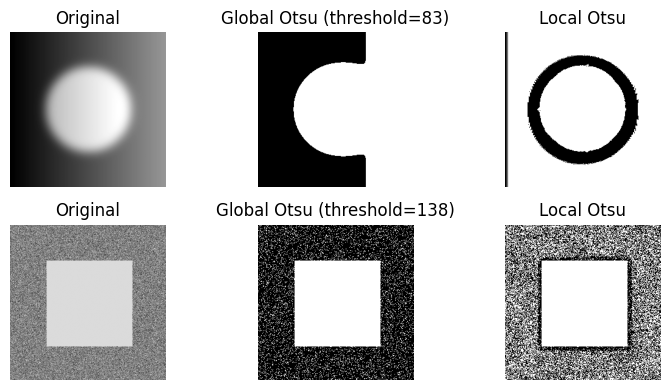

In [29]:
draw_synthetic_experiment(footprint_rectangle((16,16)))

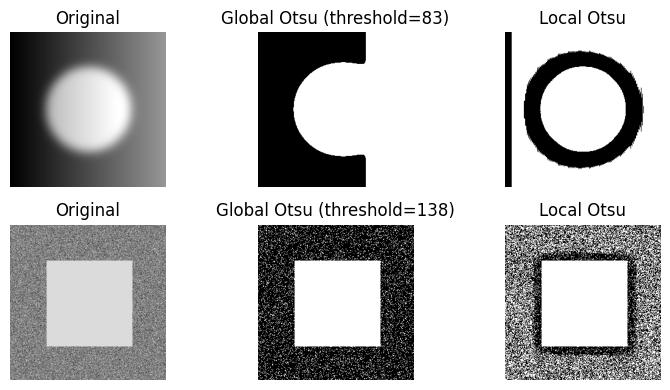

In [30]:
draw_synthetic_experiment(footprint_rectangle((32,32)))


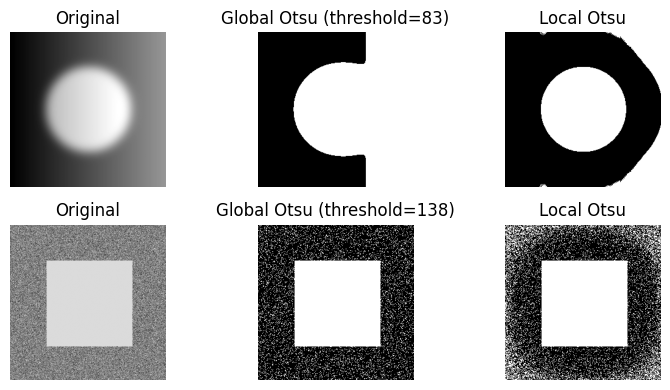

In [31]:
draw_synthetic_experiment(disk(64))

# Introducción

Introducción

El algoritmo de Otsu, también conocido como método de Otsu, es una técnica de umbralización global óptima ampliamente utilizada en procesamiento de imágenes.

Este método se considera óptimo porque busca minimizar el error promedio al asignar píxeles a dos clases: objeto y fondo.
A diferencia de los métodos bayesianos, que requieren estimar funciones de densidad de probabilidad (PDF), el método de Otsu se basa únicamente en el histograma de intensidades de la imagen, lo que lo hace computacionalmente eficiente y fácil de implementar.

La idea central del método de Otsu es que las clases correctamente umbralizadas deben presentar una clara separabilidad en sus valores de intensidad. Por lo tanto, el umbral óptimo $k*$ será aquel que maximiza la varianza interclase $\sigma^2_b(t)$.

Aunque Otsu es un método robusto y ampliamente aplicable, presenta limitaciones en imágenes con ruido severo o iluminación no uniforme, ya que estos factores pueden provocar que el histograma pierda su bimodalidad, dificultando la separación entre clases.


# Discusión <a name="discusion" />

En esta práctica aplicamos el algoritmo de Otsu en sus diversas variantes:
**Global**, **Local** (sliding window), **Multiclase**, además de compararlo con la aplicación de un **umbral fijo**.

Observamos que Otsu global funciona correctamente en muchos casos, excepto en imágenes con demasiados elementos (paisajes), cambios de iluminación o niveles de ruido elevados.
En cambio, en imágenes más controladas, como las de letras o figuras simples (por ejemplo, la imagen de lunetas o texto), Otsu logra una separación muy efectiva entre fondo y objeto.

En el caso de Otsu local (sliding window), notamos una mejora en las imágenes donde el método global mostraba deficiencias, especialmente en la imagen sintética del círculo con ruido. Sin embargo, el resultado depende significativamente del tamaño y forma de la máscara (footprint) utilizada: una ventana muy pequeña puede amplificar el ruido, mientras que una muy grande puede suavizar en exceso los bordes.
También observamos que, en imágenes con muchos detalles (como un paisaje o una figura compleja), Otsu local tiende a resaltar bordes y texturas, en lugar de separar claramente el fondo de los objetos.
En el caso de iluminación desigual, como en la imagen del sudoku, Otsu local logró mostrar los números con claridad, mientras que Otsu global oscureció las zonas más iluminadas.

En la imagen sintética del círculo centrado, tanto Otsu global como local mostraron limitaciones, debido a la distribución bimodal extrema (blanco y negro puros), lo que impide encontrar un umbral significativo.

Finalmente, exploramos Otsu multiclase, donde se calculan múltiples umbrales para dividir la imagen en más de dos regiones. Esta variante permite segmentar escenas con varios materiales o niveles de intensidad, ampliando el alcance del método más allá de la binarización simple.

## Otsu vs Single Thresholding

Si comparamos otsu con métodos tradicionales de thresholding como solo binario, truncarlo o a zero, otsu tiene mejores resultados (la mayoria de las veces), dado que el umbral que logra capturar tiende a detectar mejor el punto donde se separan las clases, a diferencia de cuando especificamos un solo threshold que generalmente es manual y es más complejo de mantener y con mayor taza de errores.


Al comparar Otsu con métodos tradicionales de umbralización fija (por ejemplo, binario simple, truncado o a cero), se observa que Otsu generalmente ofrece mejores resultados, ya que calcula automáticamente el punto de separación más adecuado entre las clases, basándose en la distribución real de intensidades.
Por el contrario, los métodos con umbral fijo requieren intervención manual y suelen ser menos adaptables ante cambios en la iluminación o el contenido de la imagen.

Para el caso de la imagen sintética bimodal estos métodos the single thresholding lo hicieron bien porque solo habia dos colores y se escogió un umbral que lograba detectar el fondo y el objeto.

# Conclusiones

- El método de Otsu es una herramienta eficiente, automática y sin parámetros para segmentar imágenes con contraste claro entre objeto y fondo.

- Su desempeño depende en gran medida de la bimodalidad del histograma: cuando esta se pierde por ruido o variaciones de iluminación, el método global se vuelve menos fiable.

- La variante local (sliding window) mejora los resultados en casos con iluminación desigual, aunque incrementa el costo computacional y puede introducir artefactos si la ventana no se elige adecuadamente.

- La versión multiclase amplía el método para escenas con múltiples materiales o intensidades, aunque también requiere mayor procesamiento.

- En comparación con los métodos de thresholding fijo, Otsu ofrece una segmentación más robusta y generalizable, reduciendo la necesidad de ajuste manual y mejorando la reproducibilidad en análisis de imágenes.

# Referencias

[1] González, R. C., & Woods, R. E. (2018). Digital Image Processing (4th ed.). Pearson.
